In [312]:
import PIL.ImageOps
from PIL import Image
import numpy as np
from skimage import feature
import sounddevice as sd
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [313]:
def file_to_image(file):
    img = Image.open(file)
    img = PIL.ImageOps.invert(img)
    
    # code below will optionally scale all images to same size, = sqrt(sampling_rate)
#     basewidth = 210
#     wpercent = (basewidth/float(img.size[0]))
#     hsize = int((float(img.size[1])*float(wpercent)))
#     img = img.resize((basewidth,hsize), PIL.Image.ANTIALIAS)

    return np.array(img.convert('L'))


def image_to_array(img):
    array = []
    for column in img:
        array += list(column)
    return np.asarray(array)


# Only add the position component if pixel is above threshold / on
def image_to_modified_array(img):
    ''' Add in component of y-value to frequency '''
    array = []
    height = len(img[0])
    for column in img:
        for i in range(height):
            pixel = column[i] + ((height - i) / height)
            array.append(pixel)
    return np.asarray(array)


def image_to_edges(image, sig):
    return np.array(feature.canny(image, sigma=sig), dtype=int)


In [314]:
def to_wave(frequency, samples):
    # Recall that a sinusoidal wave of frequency f has formula w(t) = A*sin(2*pi*f*t)
    wave = 10000 * np.sin(2 * np.pi * frequency * samples)
    
    # Convert it to wav format (16 bits)
    wav_wave = np.array(wave, dtype=np.int16)
    return wav_wave


def return_time(img_array, sample_rate):
    return float(len(img_array)) / float(sample_rate)


def return_samples(time):
    return np.arange(44100 * time) / 44100.0


In [315]:
def return_sound_wave(image, sampling_rate):
    frequency = image_to_modified_array(image)
    time = return_time(frequency,sampling_rate)
    samples = return_samples(time)
    wave = to_wave(frequency, samples)
    return wave


def play(image, sampling_rate):
    wave = return_sound_wave(image, sampling_rate)
    sd.play(wave, blocking=True)

In [316]:
fs = 44100
sd.default.samplerate = fs
sd.default.channels = 2

In [335]:
image_file = ['cornell_logo.jpg','cornell_c.jpg','clocktower.jpg', 'field.jpg']
im = file_to_image(image_file[3])

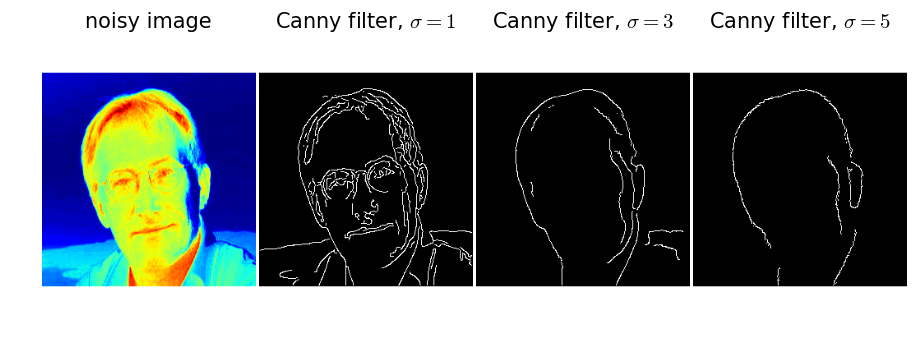

In [336]:
edges1 = image_to_edges(im,1)
edges3 = image_to_edges(im,3)
edges5 = np.array(feature.canny(im, sigma=5), dtype=int)

''' Plot image and example edgemaps '''
# display results
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(9, 4), sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.jet)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=15)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=15)

ax3.imshow(edges3, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=15)

ax4.imshow(edges5, cmap=plt.cm.gray)
ax4.axis('off')
ax4.set_title('Canny filter, $\sigma=5$', fontsize=15)

fig.subplots_adjust(wspace=0.02, hspace=0.02, top=0.75,
                    bottom=0.02, left=0.02, right=0.98)

In [337]:
# Sound of the original image
play(im, fs)

In [338]:
# Sound of the canny edgemap, sigma = 1
play(edges1, fs)

In [339]:
# Sound of the canny edgemap, sigma = 3
play(edges3, fs)

In [340]:
# Sound of the canny edgemap, sigma = 5
play(edges5, fs)

In [341]:
''' Set up for the screen recorder:
        Need to make sure that the device is Sounflower, not built-ins
'''

# for setting defaults
sd.query_devices()
sd.default.device.intput = 1
sd.default.device.output = 2

# setting up for recording - setting to soundflower
sd.default.device = 3
sd.query_devices()

  0 Built-in Microph, Core Audio (2 in, 0 out)
  1 Built-in Input, Core Audio (2 in, 0 out)
  2 Built-in Output, Core Audio (0 in, 2 out)
* 3 Soundflower (2ch), Core Audio (2 in, 2 out)
  4 Soundflower (64ch), Core Audio (64 in, 64 out)